# Futebol Feminino

## import

In [1]:
import pandas as pd
import numpy as np

In [2]:
# se o Pandas apresentar erro, ler a mensagem.
# no meu caso apresentou erro por falta da biblioteca openpyxl
# instalei com o comando abaixo:
#
# !pip install openpyxl

## dados

In [3]:
dados = pd.read_excel("copa_feminina.xlsx")
dados.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2
0,1991,China,Noruega,4.0,0.0,Grupo A,NaN,NaN
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,NaN,NaN
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,NaN,NaN
3,1991,China,Dinamarca,2.0,2.0,Grupo A,NaN,NaN
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,NaN,NaN


## Tratamento dos dados

### tratar os nulos

In [4]:
# preencher os nulos com zero
df = dados.fillna(0)
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0


### Total de gols

In [5]:
df['Total_Gols_Marcados_Selecao1'] = df['Gols Seleção 1']+df['Pênaltis Seleção 1']
df['Total_Gols_Marcados_Selecao2'] = df['Gols Seleção 2']+df['Pênaltis Seleção 2']
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0


### Saldo de gols

In [6]:
df['Saldo'] = df['Total_Gols_Marcados_Selecao1']-df['Total_Gols_Marcados_Selecao2']
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,3.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,0.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,3.0


### Seleção 1 ganhou?

In [7]:
resultados = list()
for saldo in df[['Saldo']].values:
    if saldo > 0:
        resultados.append(1)
#    elif saldo < 0:
#        resultados.append(-1)
    else:
        resultados.append(0)
df['selecao_1_ganhou'] = resultados

df.head(10)

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo,selecao_1_ganhou
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,3.0,1
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,0.0,0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,3.0,1
5,1991,Noruega,Dinamarca,2.0,1.0,Grupo A,0.0,0.0,2.0,1.0,1.0,1
6,1991,Japão,Brasil,0.0,1.0,Grupo B,0.0,0.0,0.0,1.0,-1.0,0
7,1991,Suécia,Estados Unidos,2.0,5.0,Grupo B,0.0,0.0,2.0,5.0,-3.0,0
8,1991,Japão,Suécia,0.0,8.0,Grupo B,0.0,0.0,0.0,8.0,-8.0,0
9,1991,Brasil,Estados Unidos,0.0,5.0,Grupo B,0.0,0.0,0.0,5.0,-5.0,0


### Status das Seleções em cada Edição

#### Seleção 1

In [8]:
df_status_sel1 = df.groupby(["Seleção 1", "ANO"]).agg({"Seleção 1": "size",
                                                       "Total_Gols_Marcados_Selecao1": "sum",
                                                       "Total_Gols_Marcados_Selecao2": "sum",
                                                       "Saldo": "sum"})
df_status_sel1.columns = ['n_games', 'gols_feitos', 'gols_sofridos', 'saldo']
df_status_sel1.index = df_status_sel1.index.rename(['SELECAO', 'ANO'])
df_status_sel1

n_games  gols_feitos  gols_sofridos  saldo
SELECAO       ANO                                             
Alemanha      1991        3          6.0            9.0   -3.0
              1995        4          5.0            2.0    3.0
              1999        3         10.0            4.0    6.0
              2003        4         16.0            3.0   13.0
              2007        5         21.0            0.0   21.0
...                     ...          ...            ...    ...
Taipé Chinês  1991        3          2.0            8.0   -6.0
Vietnã        2023        1          0.0            0.0    0.0
Zâmbia        2023        1          0.0            5.0   -5.0
África do Sul 2019        2          0.0            5.0   -5.0
              2023        1          0.0            0.0    0.0

[156 rows x 4 columns]

#### Seleção 2

In [9]:
df_status_sel2 = df.groupby(["Seleção 2", "ANO"]).agg({"Seleção 2": "size",
                                                       "Total_Gols_Marcados_Selecao2": "sum",
                                                       "Total_Gols_Marcados_Selecao1": "sum",
                                                       "Saldo": "sum"})
df_status_sel2.columns = ['n_games', 'gols_feitos', 'gols_sofridos', 'saldo']
df_status_sel2['saldo'] = df_status_sel2['saldo'] * -1 
df_status_sel2.index = df_status_sel2.index.rename(['SELECAO', 'ANO'])
df_status_sel2

n_games  gols_feitos  gols_sofridos  saldo
SELECAO       ANO                                             
Alemanha      1991        3          7.0            1.0    6.0
              1995        2          8.0            4.0    4.0
              1999        1          2.0            3.0   -1.0
              2003        2          9.0            1.0    8.0
              2007        1          0.0            0.0   -0.0
...                     ...          ...            ...    ...
Taipé Chinês  1991        1          0.0            7.0   -7.0
Vietnã        2023        2          0.0            5.0   -5.0
Zâmbia        2023        2          0.0            5.0   -5.0
África do Sul 2019        1          1.0            3.0   -2.0
              2023        2          3.0            4.0   -1.0

[163 rows x 4 columns]

### df_status | Status das Seleções

In [10]:
df_status = df_status_sel1.add(df_status_sel2, fill_value=0).reset_index()
df_status.sort_values("ANO", inplace=True)
df_status

,SELECAO,ANO,n_games,gols_feitos,gols_sofridos,saldo
0,Alemanha,1991,6.0,13.0,10.0,3.0
100,Itália,1991,4.0,8.0,5.0,3.0
21,Brasil,1991,3.0,1.0,7.0,-6.0
119,Nigéria,1991,3.0,0.0,7.0,-7.0
128,Noruega,1991,6.0,14.0,10.0,4.0
...,...,...,...,...,...,...
136,Noruega,2023,3.0,0.0,1.0,-1.0
67,Dinamarca,2023,3.0,1.0,1.0,0.0
142,Nova Zelândia,2023,3.0,1.0,1.0,0.0
82,Filipinas,2023,3.0,1.0,2.0,-1.0


In [11]:
df_status[df_status["SELECAO"]=="Brasil"]

,SELECAO,ANO,n_games,gols_feitos,gols_sofridos,saldo
21,Brasil,1991,3.0,1.0,7.0,-6.0
22,Brasil,1995,3.0,3.0,9.0,-6.0
23,Brasil,1999,6.0,21.0,13.0,8.0
24,Brasil,2003,4.0,9.0,4.0,5.0
25,Brasil,2007,6.0,17.0,4.0,13.0
26,Brasil,2011,4.0,12.0,7.0,5.0
27,Brasil,2015,4.0,4.0,1.0,3.0
28,Brasil,2019,4.0,7.0,5.0,2.0
29,Brasil,2023,3.0,4.0,0.0,4.0


### Status acumulado ao longo dos anos

In [12]:
# aqui eu removo o campo ano, para nao ser feito a soma dos anos, o que não faz sentido!
df_status_acumulado = df_status[['SELECAO','n_games','gols_feitos','gols_sofridos','saldo']].\
    groupby("SELECAO").cumsum()

df_status_acumulado['SELECAO'] = df_status['SELECAO']

df_status_acumulado['ANO'] = df_status['ANO']

df_status_acumulado.sort_values("ANO", inplace=True)

df_status_acumulado

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
0,6.0,13.0,10.0,3.0,Alemanha,1991
163,4.0,2.0,15.0,-13.0,Taipé Chinês,1991
63,4.0,7.0,6.0,1.0,Dinamarca,1991
150,6.0,18.0,9.0,9.0,Suécia,1991
41,4.0,10.0,4.0,6.0,China,1991
...,...,...,...,...,...,...
61,6.0,3.0,9.0,-6.0,Costa Rica,2023
48,36.0,62.0,41.0,21.0,China,2023
82,3.0,1.0,2.0,-1.0,Filipinas,2023
99,3.0,1.0,3.0,-2.0,Irlanda,2023


#### Verificando o status da Alemanha

In [13]:
df_status_acumulado[df_status_acumulado['SELECAO'] =='Alemanha']

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
0,6.0,13.0,10.0,3.0,Alemanha,1991
1,12.0,26.0,16.0,10.0,Alemanha,1995
2,16.0,38.0,23.0,15.0,Alemanha,1999
3,22.0,63.0,27.0,36.0,Alemanha,2003
4,28.0,84.0,27.0,57.0,Alemanha,2007
5,32.0,91.0,31.0,60.0,Alemanha,2011
6,39.0,116.0,41.0,75.0,Alemanha,2015
7,44.0,126.0,43.0,83.0,Alemanha,2019
8,47.0,132.0,43.0,89.0,Alemanha,2023


#### Verificando o status do Brasil

In [14]:
df_status_acumulado[df_status_acumulado['SELECAO'] =='Brasil']

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
21,3.0,1.0,7.0,-6.0,Brasil,1991
22,6.0,4.0,16.0,-12.0,Brasil,1995
23,12.0,25.0,29.0,-4.0,Brasil,1999
24,16.0,34.0,33.0,1.0,Brasil,2003
25,22.0,51.0,37.0,14.0,Brasil,2007
26,26.0,63.0,44.0,19.0,Brasil,2011
27,30.0,67.0,45.0,22.0,Brasil,2015
28,34.0,74.0,50.0,24.0,Brasil,2019
29,37.0,78.0,50.0,28.0,Brasil,2023


## Machine Learning

### Função Gera_DF

In [15]:
# Função que vai gerar um DataFrame com o tabelão que tenha os resultados dos jogos até o ano analisado
# + status dos times até o ano analisado
def fn_gera_df(df, df_status_acumulado_, df_status_):
    df_ = pd.merge_asof(df, df_status_acumulado_, left_by=['Seleção 1'], right_by=['SELECAO'], on=['ANO'])
    df_ = pd.merge_asof(df_, df_status_acumulado_, left_by=['Seleção 2'], right_by=['SELECAO'], on=['ANO'], suffixes=['_SEL1', '_SEL2'])
    df_ = pd.merge_asof(df_, df_status_, left_by=['Seleção 1'], right_by=['SELECAO'], on=['ANO'])
    df_ = pd.merge_asof(df_, df_status_, left_by=['Seleção 2'], right_by=['SELECAO'], on=['ANO'], suffixes=['_status1', '_status2'])
    return df_

In [16]:
# pd.set_option('display.max_columns', None)
# df_[df_['Seleção 1'] == "Alemanha"].head()

### lista das datas

In [17]:
dados['ANO'].unique().tolist()

[1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]

In [18]:
dados['ANO'].unique().tolist()[1:]

[1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]

In [19]:
dados['ANO'].unique().tolist()[1:-1]

[1995, 1999, 2003, 2007, 2011, 2015, 2019]

### primeiro modelo | Regressão Logística

In [20]:
# import do modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, classification_report, f1_score, accuracy_score

In [21]:
anos = dados['ANO'].unique().tolist()[1:-1]
edicao = 1995


In [22]:
dftr = df[df['ANO'] < edicao].copy()
dftr

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo,selecao_1_ganhou
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,3.0,1
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,0.0,0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,3.0,1
5,1991,Noruega,Dinamarca,2.0,1.0,Grupo A,0.0,0.0,2.0,1.0,1.0,1
6,1991,Japão,Brasil,0.0,1.0,Grupo B,0.0,0.0,0.0,1.0,-1.0,0
7,1991,Suécia,Estados Unidos,2.0,5.0,Grupo B,0.0,0.0,2.0,5.0,-3.0,0
8,1991,Japão,Suécia,0.0,8.0,Grupo B,0.0,0.0,0.0,8.0,-8.0,0
9,1991,Brasil,Estados Unidos,0.0,5.0,Grupo B,0.0,0.0,0.0,5.0,-5.0,0


In [23]:
dfval = df[df['ANO'] == edicao].copy()
dfval

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo,selecao_1_ganhou
26,1995,Suécia,Brasil,0.0,1.0,Grupo A,0.0,0.0,0.0,1.0,-1.0,0
27,1995,Alemanha,Japão,1.0,0.0,Grupo A,0.0,0.0,1.0,0.0,1.0,1
28,1995,Suécia,Alemanha,3.0,2.0,Grupo A,0.0,0.0,3.0,2.0,1.0,1
29,1995,Brasil,Japão,1.0,3.0,Grupo A,0.0,0.0,1.0,3.0,-2.0,0
30,1995,Suécia,Japão,2.0,0.0,Grupo A,0.0,0.0,2.0,0.0,2.0,1
31,1995,Brasil,Alemanha,1.0,6.0,Grupo A,0.0,0.0,1.0,6.0,-5.0,0
32,1995,Noruega,Nigéria,8.0,0.0,Grupo B,0.0,0.0,8.0,0.0,8.0,1
33,1995,Inglaterra,Canadá,3.0,2.0,Grupo B,0.0,0.0,3.0,2.0,1.0,1
34,1995,Noruega,Inglaterra,2.0,0.0,Grupo B,0.0,0.0,2.0,0.0,2.0,1
35,1995,Nigéria,Canadá,3.0,3.0,Grupo B,0.0,0.0,3.0,3.0,0.0,0


In [24]:
tr_ = fn_gera_df(dftr, df_status_acumulado, df_status)
tr_

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,...,SELECAO_status1,n_games_status1,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,...,China,4.0,10.0,4.0,6.0,Noruega,6.0,14.0,10.0,4.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,...,Dinamarca,4.0,7.0,6.0,1.0,Nova Zelândia,3.0,1.0,11.0,-10.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,...,Noruega,6.0,14.0,10.0,4.0,Nova Zelândia,3.0,1.0,11.0,-10.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,...,China,4.0,10.0,4.0,6.0,Dinamarca,4.0,7.0,6.0,1.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,...,China,4.0,10.0,4.0,6.0,Nova Zelândia,3.0,1.0,11.0,-10.0
5,1991,Noruega,Dinamarca,2.0,1.0,Grupo A,0.0,0.0,2.0,1.0,...,Noruega,6.0,14.0,10.0,4.0,Dinamarca,4.0,7.0,6.0,1.0
6,1991,Japão,Brasil,0.0,1.0,Grupo B,0.0,0.0,0.0,1.0,...,Japão,3.0,0.0,12.0,-12.0,Brasil,3.0,1.0,7.0,-6.0
7,1991,Suécia,Estados Unidos,2.0,5.0,Grupo B,0.0,0.0,2.0,5.0,...,Suécia,6.0,18.0,9.0,9.0,Estados Unidos,6.0,27.0,5.0,22.0
8,1991,Japão,Suécia,0.0,8.0,Grupo B,0.0,0.0,0.0,8.0,...,Japão,3.0,0.0,12.0,-12.0,Suécia,6.0,18.0,9.0,9.0
9,1991,Brasil,Estados Unidos,0.0,5.0,Grupo B,0.0,0.0,0.0,5.0,...,Brasil,3.0,1.0,7.0,-6.0,Estados Unidos,6.0,27.0,5.0,22.0


In [25]:
val_ = fn_gera_df(dfval, df_status_acumulado, df_status)
val_

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,...,SELECAO_status1,n_games_status1,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2
0,1995,Suécia,Brasil,0.0,1.0,Grupo A,0.0,0.0,0.0,1.0,...,Suécia,4.0,9.0,8.0,1.0,Brasil,3.0,3.0,9.0,-6.0
1,1995,Alemanha,Japão,1.0,0.0,Grupo A,0.0,0.0,1.0,0.0,...,Alemanha,6.0,13.0,6.0,7.0,Japão,4.0,3.0,8.0,-5.0
2,1995,Suécia,Alemanha,3.0,2.0,Grupo A,0.0,0.0,3.0,2.0,...,Suécia,4.0,9.0,8.0,1.0,Alemanha,6.0,13.0,6.0,7.0
3,1995,Brasil,Japão,1.0,3.0,Grupo A,0.0,0.0,1.0,3.0,...,Brasil,3.0,3.0,9.0,-6.0,Japão,4.0,3.0,8.0,-5.0
4,1995,Suécia,Japão,2.0,0.0,Grupo A,0.0,0.0,2.0,0.0,...,Suécia,4.0,9.0,8.0,1.0,Japão,4.0,3.0,8.0,-5.0
5,1995,Brasil,Alemanha,1.0,6.0,Grupo A,0.0,0.0,1.0,6.0,...,Brasil,3.0,3.0,9.0,-6.0,Alemanha,6.0,13.0,6.0,7.0
6,1995,Noruega,Nigéria,8.0,0.0,Grupo B,0.0,0.0,8.0,0.0,...,Noruega,6.0,23.0,1.0,22.0,Nigéria,3.0,5.0,14.0,-9.0
7,1995,Inglaterra,Canadá,3.0,2.0,Grupo B,0.0,0.0,3.0,2.0,...,Inglaterra,4.0,6.0,9.0,-3.0,Canadá,3.0,5.0,13.0,-8.0
8,1995,Noruega,Inglaterra,2.0,0.0,Grupo B,0.0,0.0,2.0,0.0,...,Noruega,6.0,23.0,1.0,22.0,Inglaterra,4.0,6.0,9.0,-3.0
9,1995,Nigéria,Canadá,3.0,3.0,Grupo B,0.0,0.0,3.0,3.0,...,Nigéria,3.0,5.0,14.0,-9.0,Canadá,3.0,5.0,13.0,-8.0


In [26]:
#selecionando as colunas que vamos usar
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

In [27]:
Xtr = tr_[features].fillna(0)
Xval = val_[features].fillna(0)
ytr = tr_['selecao_1_ganhou']
yval = val_['selecao_1_ganhou']

In [28]:
mdl = LogisticRegression()
mdl.fit(Xtr, ytr)

LogisticRegression()

In [29]:
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

In [30]:
log_loss(yval, p)

0.6302548499819299

In [31]:
#acuracia = roc_auc_score(yval,p,multi_class='ovr')
acuracia = accuracy_score(yval, p_)
print("Ano: {} | LL: {} | AUC: {}".format(edicao, log_loss(yval, p), acuracia))

Ano: 1995 | LL: 0.6302548499819299 | AUC: 0.8076923076923077


In [32]:
print(classification_report(yval, p_))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.79      0.94      0.86        16

    accuracy                           0.81        26
   macro avg       0.82      0.77      0.78        26
weighted avg       0.82      0.81      0.80        26



In [33]:
import seaborn as sns

<AxesSubplot:xlabel='previsao', ylabel='real'>

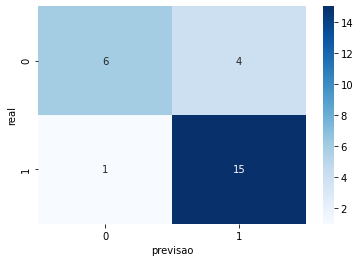

In [34]:
#confusion Matrix

res=yval
pred=p_

cf=pd.DataFrame({'real': res, 'previsao':pred})

cf=pd.DataFrame(cf,columns=['real','previsao' ])

cf_matrix=pd.crosstab(cf['real'], cf['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

#### Fazendo um loop e validando a tabela toda

In [35]:
dados['ANO'].unique().tolist()[1:-1]

[1995, 1999, 2003, 2007, 2011, 2015, 2019]

In [36]:
acuracia = list()
anos = dados['ANO'].unique().tolist()[1:-1]
for edicao in anos:
    dftr = df[df['ANO'] < edicao].copy()
    dfval = df[df['ANO'] == edicao].copy()
    
    features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
                'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
                'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
                'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']
    
    tr_ = fn_gera_df(dftr, df_status_acumulado, df_status)
    val_ = fn_gera_df(dfval, df_status_acumulado, df_status)
    
    Xtr = tr_[features].fillna(0)
    Xval = val_[features].fillna(0)
    ytr = dftr['selecao_1_ganhou']
    yval = dfval['selecao_1_ganhou']
    
    mdl = LogisticRegression(max_iter=1000)
    mdl.fit(Xtr, ytr)
    
    p = mdl.predict_proba(Xval)[:,1]
    p_ = mdl.predict(Xval)
    
    acuracia_ = accuracy_score(yval, p_)
    print("Ano: {} | LL: {} | AUC: {}".format(edicao, log_loss(yval, p), acuracia_))
    acuracia.append(acuracia_)
    print()
    print(classification_report(yval,p_))
    print()
print("Acurácia média: {}".format(np.mean(acuracia)))

Ano: 1995 | LL: 0.6302548499819299 | AUC: 0.8076923076923077

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.79      0.94      0.86        16

    accuracy                           0.81        26
   macro avg       0.82      0.77      0.78        26
weighted avg       0.82      0.81      0.80        26


Ano: 1999 | LL: 0.3549047672780233 | AUC: 0.875

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.90      0.90      0.90        20

    accuracy                           0.88        32
   macro avg       0.87      0.87      0.87        32
weighted avg       0.88      0.88      0.88        32


Ano: 2003 | LL: 0.48464392794313327 | AUC: 0.8125

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.70      0.82        20

    accuracy      

<AxesSubplot:xlabel='previsao', ylabel='real'>

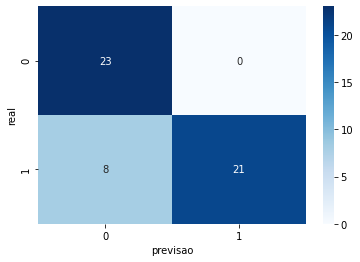

In [37]:
#confusion Matrix

res=yval
pred=p_

cf=pd.DataFrame({'real': res, 'previsao':pred})

cf=pd.DataFrame(cf,columns=['real','previsao' ])

cf_matrix=pd.crosstab(cf['real'], cf['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

### 2023

In [38]:
edicao = 2023
df_futuro = df[df['ANO'] == edicao].copy()

features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

val_ = fn_gera_df(df_futuro, df_status_acumulado, df_status)

Xval = val_[features].fillna(0)
yval = df_futuro['selecao_1_ganhou']

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

In [39]:
df_futuro['p'] = p
df_futuro['p_'] = p_

In [40]:
df_futuro[df_futuro['Fase'] == "Grupo F"][['ANO', 'Seleção 1', 'Seleção 2', 'selecao_1_ganhou', 'p', 'p_']]

,ANO,Seleção 1,Seleção 2,selecao_1_ganhou,p,p_
314,2023,França,Jamaica,0,0.302975,0
315,2023,Brasil,Panamá,1,0.805937,1
316,2023,França,Brasil,0,0.018082,0
317,2023,Panamá,Jamaica,0,0.085542,0
318,2023,Panamá,França,0,0.023614,0
319,2023,Jamaica,Brasil,0,0.013447,0


In [41]:
df_futuro[['ANO', 'Seleção 1', 'Seleção 2', 'Fase','selecao_1_ganhou', 'p', 'p_']]

,ANO,Seleção 1,Seleção 2,Fase,selecao_1_ganhou,p,p_
284,2023,Nova Zelândia,Noruega,Grupo A,1,0.116844,0
285,2023,Filipinas,Suíça,Grupo A,0,0.084719,0
286,2023,Nova Zelândia,Filipinas,Grupo A,0,0.486977,0
287,2023,Suíça,Noruega,Grupo A,0,0.054605,0
288,2023,Suíça,Nova Zelândia,Grupo A,0,0.040853,0
289,2023,Noruega,Filipinas,Grupo A,0,0.561060,1
290,2023,Austrália,Irlanda,Grupo B,1,0.684734,1
291,2023,Nigéria,Canadá,Grupo B,0,0.103648,0
292,2023,Canadá,Irlanda,Grupo B,1,0.703262,1
293,2023,Austrália,Nigéria,Grupo B,0,0.063495,0


### Oitavas

In [51]:
oitavas = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Noruéga", "Seleção 2": "Japão", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Países Baixos", "Seleção 2": "Itália", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Espanha", "Seleção 2": "Nova Zelândia", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Suécia", "Seleção 2": "Estados Unidos", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Austrália", "Seleção 2": "Inglaterra", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Brasil", "Seleção 2": "Coreia do Sul", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Dinamarca", "Seleção 2": "Canadá", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Alemanha", "Seleção 2": "Jamaica", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Oitavas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0}
                       ])
oitavas

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou
0,2023,Noruéga,Japão,0,0,Oitavas,0,0,0
1,2023,Países Baixos,Itália,0,0,Oitavas,0,0,0
2,2023,Espanha,Nova Zelândia,0,0,Oitavas,0,0,0
3,2023,Suécia,Estados Unidos,0,0,Oitavas,0,0,0
4,2023,Austrália,Inglaterra,0,0,Oitavas,0,0,0
5,2023,Brasil,Coreia do Sul,0,0,Oitavas,0,0,0
6,2023,Dinamarca,Canadá,0,0,Oitavas,0,0,0
7,2023,Alemanha,Jamaica,0,0,Oitavas,0,0,0


In [52]:
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

val_ = fn_gera_df(oitavas, df_status_acumulado, df_status)

Xval = val_[features].fillna(0)
yval = oitavas['selecao_1_ganhou']

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

oitavas['p'] = p
oitavas['p_'] = p_

oitavas

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou,p,p_
0,2023,Noruéga,Japão,0,0,Oitavas,0,0,0,0.000046,0
1,2023,Países Baixos,Itália,0,0,Oitavas,0,0,0,0.037108,0
2,2023,Espanha,Nova Zelândia,0,0,Oitavas,0,0,0,0.088878,0
3,2023,Suécia,Estados Unidos,0,0,Oitavas,0,0,0,0.053578,0
4,2023,Austrália,Inglaterra,0,0,Oitavas,0,0,0,0.044185,0
5,2023,Brasil,Coreia do Sul,0,0,Oitavas,0,0,0,0.478271,0
6,2023,Dinamarca,Canadá,0,0,Oitavas,0,0,0,0.022806,0
7,2023,Alemanha,Jamaica,0,0,Oitavas,0,0,0,0.474695,0


### quartas

In [53]:
quartas = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Japão", "Seleção 2": "Itália", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Quartas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Nova Zelândia", "Seleção 2": "Estados Unidos", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Quartas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Inglaterra", "Seleção 2": "Coreia do Sul", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Quartas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Canadá", "Seleção 2": "Jamaica", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"Quartas", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0}
                       ])
quartas

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou
0,2023,Japão,Itália,0,0,Quartas,0,0,0
1,2023,Nova Zelândia,Estados Unidos,0,0,Quartas,0,0,0
2,2023,Inglaterra,Coreia do Sul,0,0,Quartas,0,0,0
3,2023,Canadá,Jamaica,0,0,Quartas,0,0,0


In [54]:
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

val_ = fn_gera_df(quartas, df_status_acumulado, df_status)

Xval = val_[features].fillna(0)
yval = quartas['selecao_1_ganhou']

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

quartas['p'] = p
quartas['p_'] = p_

quartas

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou,p,p_
0,2023,Japão,Itália,0,0,Quartas,0,0,0,0.374086,0
1,2023,Nova Zelândia,Estados Unidos,0,0,Quartas,0,0,0,0.038715,0
2,2023,Inglaterra,Coreia do Sul,0,0,Quartas,0,0,0,0.286015,0
3,2023,Canadá,Jamaica,0,0,Quartas,0,0,0,0.555774,1


### Semi

In [55]:
semi = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Itália", "Seleção 2": "Estados Unidos", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"SEMI", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0},
    {"ANO": 2023, "Seleção 1": "Coreia do Sul", "Seleção 2": "Canadá", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"SEMI", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0}
                       ])
semi

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou
0,2023,Itália,Estados Unidos,0,0,SEMI,0,0,0
1,2023,Coreia do Sul,Canadá,0,0,SEMI,0,0,0


In [56]:
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

val_ = fn_gera_df(semi, df_status_acumulado, df_status)

Xval = val_[features].fillna(0)
yval = semi['selecao_1_ganhou']

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

semi['p'] = p
semi['p_'] = p_

semi

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou,p,p_
0,2023,Itália,Estados Unidos,0,0,SEMI,0,0,0,0.016715,0
1,2023,Coreia do Sul,Canadá,0,0,SEMI,0,0,0,0.020220,0


### Final

In [57]:
final = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Estados Unidos", "Seleção 2": "Canadá", "Gols Seleção 1":0, "Gols Seleção 2":0,"Fase":"FINAL", "Pênaltis Seleção 1":0, "Pênaltis Seleção 2": 0, "selecao_1_ganhou":0}])
final

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou
0,2023,Estados Unidos,Canadá,0,0,FINAL,0,0,0


In [58]:
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

val_ = fn_gera_df(final, df_status_acumulado, df_status)

Xval = val_[features].fillna(0)
yval = final['selecao_1_ganhou']

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

final['p'] = p
final['p_'] = p_

final

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,selecao_1_ganhou,p,p_
0,2023,Estados Unidos,Canadá,0,0,FINAL,0,0,0,0.031993,0
